In [1]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [12]:
categories = ['talk.religion.misc', 'soc.religion.christian','rec.motorcycles',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [13]:
print(train.data[5])

From: aws@iti.org (Allen W. Sherzer)
Subject: Re: Why not give $1 billion to first year-long moon residents?
Organization: Evil Geniuses for a Better Tomorrow
Lines: 34

In article <C5sJDp.F23@zoo.toronto.edu> henry@zoo.toronto.edu (Henry Spencer) writes:

>>This prize isn't big enough to warrent developing a SSTO, but it is
>>enough to do it if the vehicle exists.

>Actually, there are people who will tell you that it *would* be enough
>to do SSTO development, if done privately as a cut-rate operation.  Of
>course, they may be over-optimistic.

In spite of my great respect for the people you speak of, I think their
cost estimates are a bit over-optimistic. If nothing else, a working SSTO
is at least as complex as a large airliner and has a smaller experience
base. It therefore seems that SSTO development should cost at least as
much as a typical airliner development. That puts it in the $3G to $5G
range.

>You can also assume that a working SSTO would have other applications
>that wou

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [15]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

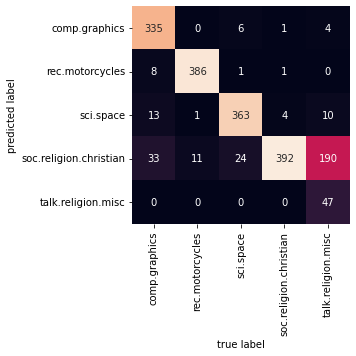

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [17]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [18]:
predict_category('determining the screen resolution')

'comp.graphics'

In [20]:
predict_category('what is 650 cc?')

'rec.motorcycles'

In [21]:
predict_category('launching payload')

'sci.space'